In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
plt.rcParams['font.sans-serif'] = ['SimHei']

all_data = pd.read_csv('../datasets/all.csv')
city_data = all_data.groupby('city')

In [23]:
tot_price = pd.DataFrame()
tot_price['City'] = city_data['city'].unique().apply(lambda x: x[0])
tot_price['Mean'] = city_data['price'].mean()
tot_price['Max'] = city_data['price'].max()
tot_price['Min'] = city_data['price'].min()
tot_price['Median'] = city_data['price'].median()

print(tot_price)

     City         Mean     Max  Min  Median
city                                       
上海     上海  7603.876404  500000  500  5530.0
北京     北京  8316.563638  450000  500  6330.0
广州     广州  4523.407910  300000  310  3200.0
深圳     深圳  7143.238120  500000  550  5200.0
驻马店   驻马店  1311.642557   43200  300  1100.0


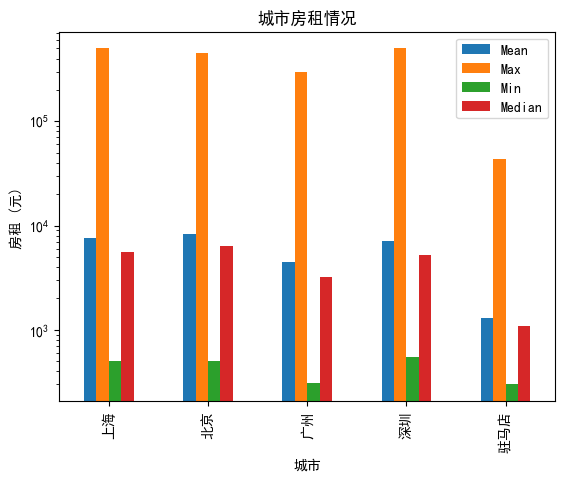

In [24]:
tot_price.plot(kind='bar', x='City', y=['Mean', 'Max', 'Min', 'Median'], legend=True)

# 使用对数坐标, 避免数字太大无法显示
plt.yscale('log')
plt.xlabel('城市')
plt.ylabel('房租 (元)')
plt.title('城市房租情况')
plt.savefig('imgs/城市房租情况.png')

In [25]:
# 计算每个城市的单位面积价格统计数据
unit_price = all_data.groupby('city')[['price', 'area']].apply(lambda x: pd.Series({
    'Mean': (x['price'] / x['area']).mean(),
    'Max': (x['price'] / x['area']).max(),
    'Min': (x['price'] / x['area']).min(),
    'Median': (x['price'] / x['area']).median()
})).reset_index()

print(unit_price)

  city        Mean          Max       Min     Median
0   上海   99.787047  7000.000000  4.965736  93.432500
1   北京   96.015706  1392.649903  8.983992  90.721649
2   广州   53.682015  1785.833333  2.862254  46.000000
3   深圳  101.831855  1550.387597  2.607261  88.732394
4  驻马店   14.965140   833.000000  2.500000  13.793103


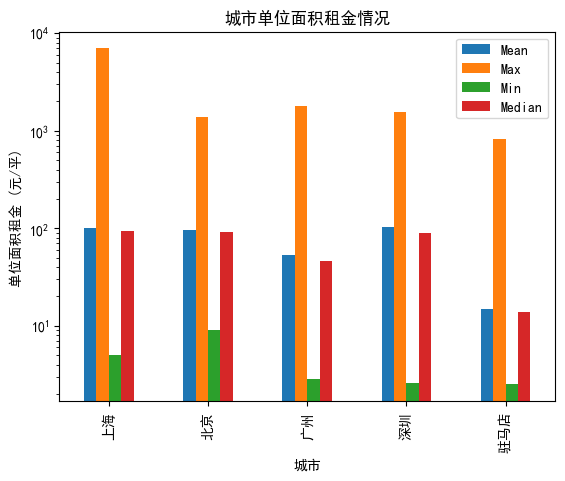

In [26]:
unit_price.plot(kind='bar', x='city', y=['Mean', 'Max', 'Min', 'Median'], legend=True)

plt.yscale('log')

plt.title('城市单位面积租金情况')
plt.xlabel('城市')
plt.ylabel('单位面积租金 (元/平)')

# 保存并显示图表
plt.savefig('imgs/城市单位面积租金情况.png')